In [1]:
import lightgbm as lgb
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split


In [2]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

In [3]:
# load the whole size dataset
X = np.load("Aal/X_all.npy")
Y_NO2 = np.load("Aal/Y_NO2_all.npy")
Y_NOx = np.load("Aal/Y_NOx_all.npy")

In [4]:
# calculate the symmetric mean absolute percentage error (SMAPE)
def get_score(pred, valid_y_exp):
    return np.mean(np.abs(pred - valid_y_exp) / (pred + valid_y_exp) * 2)

In [5]:
# lightgbm model parameters
# model_param = {'lr': 0.02, 'depth': 10, 'tree': 3000, 'leaf': 400, 'sample': 0.9, 'seed': 3}

# model_param = {'lr': 0.1, 'depth': 10, 'tree': 300, 'leaf': 600, 'sample': 0.8, 'seed': 3}

# train and test the input X Y with the lightgbm model
def train_test(model_param, train_X, test_X, train_Y, test_Y, save_dir):
    time_start = time.time()
    lgb_train = lgb.Dataset(train_X, train_Y)
    lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)
    
    params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': {'l2', 'l1'},
    'max_depth': model_param['depth'],
    'num_leaves': model_param['leaf'],
    'min_data_in_leaf': 20,
    'learning_rate': model_param['lr'],
    'feature_fraction': 1,
    'bagging_fraction': model_param['sample'],
    'bagging_freq': 1,
    'bagging_seed': model_param['seed'],
#     'min_sum_hessian_in_leaf': 100,
    'verbose': 0
    }
    
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=model_param['tree'],
                    valid_sets=lgb_eval,
                    early_stopping_rounds=20)

    test_predict = gbm.predict(test_X)
    score = get_score(test_predict, test_Y)
    save_pkl(save_dir, gbm)
    print('running time: ', time.time() - time_start)
    return score

In [6]:
# PM 2.5

In [7]:
# split the Y_PM25, X into training part and testing part
train_X_NOx, test_X_NOx, train_Y_NOx, test_Y_NOx = train_test_split(X, Y_NOx, test_size=0.2, random_state=11)
print(train_X_NOx.shape, test_X_NOx.shape, train_Y_NOx.shape, test_Y_NOx.shape)

(665395, 182) (166349, 182) (665395,) (166349,)


In [8]:
model_param = {'lr': 0.01, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}
score = train_test(model_param, train_X_NOx, test_X_NOx, train_Y_NOx, test_Y_NOx, "Aal/lightgbm_NOx_1.model")
print('score: ', score)

C:\Users\Nobody\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 538.37	valid_0's l1: 15.6319
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 529.57	valid_0's l1: 15.4968
[3]	valid_0's l2: 520.936	valid_0's l1: 15.3631
[4]	valid_0's l2: 512.486	valid_0's l1: 15.2312
[5]	valid_0's l2: 504.183	valid_0's l1: 15.1005
[6]	valid_0's l2: 496.036	valid_0's l1: 14.9716
[7]	valid_0's l2: 488.066	valid_0's l1: 14.8444
[8]	valid_0's l2: 480.275	valid_0's l1: 14.7187
[9]	valid_0's l2: 472.618	valid_0's l1: 14.5943
[10]	valid_0's l2: 465.073	valid_0's l1: 14.471
[11]	valid_0's l2: 457.722	valid_0's l1: 14.3491
[12]	valid_0's l2: 450.488	valid_0's l1: 14.2288
[13]	valid_0's l2: 443.406	valid_0's l1: 14.1101
[14]	valid_0's l2: 436.464	valid_0's l1: 13.9926
[15]	valid_0's l2: 429.632	valid_0's

In [9]:
gbm = read_pkl("Aal/lightgbm_NOx_1.model")
test_X = np.load("Aal/X_test.npy")
test_Y = np.load("Aal/Y_NOx_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3334103142190301

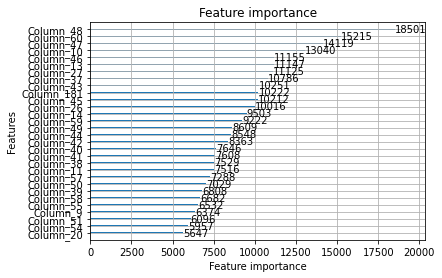

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [11]:
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}
score = train_test(model_param, train_X_NOx, test_X_NOx, train_Y_NOx, test_Y_NOx, "Aal/lightgbm_NOx.model")
print('score: ', score)

C:\Users\Nobody\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 542.845	valid_0's l1: 15.7002
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 538.389	valid_0's l1: 15.6322
[3]	valid_0's l2: 533.975	valid_0's l1: 15.5646
[4]	valid_0's l2: 529.613	valid_0's l1: 15.4974
[5]	valid_0's l2: 525.285	valid_0's l1: 15.4305
[6]	valid_0's l2: 520.997	valid_0's l1: 15.3641
[7]	valid_0's l2: 516.765	valid_0's l1: 15.2982
[8]	valid_0's l2: 512.575	valid_0's l1: 15.2325
[9]	valid_0's l2: 508.42	valid_0's l1: 15.1673
[10]	valid_0's l2: 504.295	valid_0's l1: 15.1024
[11]	valid_0's l2: 500.224	valid_0's l1: 15.0379
[12]	valid_0's l2: 496.18	valid_0's l1: 14.9737
[13]	valid_0's l2: 492.18	valid_0's l1: 14.91
[14]	valid_0's l2: 488.219	valid_0's l1: 14.8465
[15]	valid_0's l2: 484.29	valid_0's l1

In [12]:
gbm = read_pkl("Aal/lightgbm_NOx.model")
test_X = np.load("Aal/X_test.npy")
test_Y = np.load("Aal/Y_NOx_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.33624783859167756

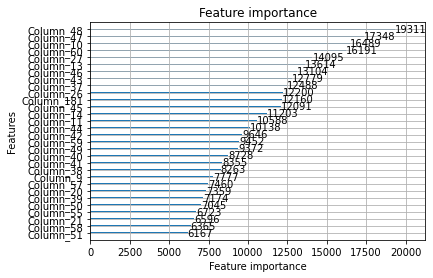

"\nfeatures = ['PM25_Concentration','PM10_Concentration','NO2_Concentration', # feature 0-2\n            'temperature','pressure','humidity','wind_speed', 'wind_direction', # feature 3-7\n            'holiday','time_month','time_week','time_day','time_hour','station_index', # feature 8-13\n            \n            'mean_PM25','mean_PM10','mean_NO2','mean_temperature','mean_pressure','mean_humidity','mean_wind_speed','mean_wind_direction', # feature 14-21\n            'max_PM25','max_PM10','max_NO2','max_temperature','max_pressure','max_humidity','max_wind_speed', # feature 22-28\n            'var_PM25','var_PM10','var_NO2','var_temperature','var_pressure','var_humidity','var_wind_speed','var_wind_speed', # feature 29-36\n            'pressure_temperature','temperature_humidity','PM','PM25_10' # feature 37-40\n            \n            # feature 41-52: historical PM2.5 features\n            # feature 53-64: historical PM10 features\n            # feature 65-76: historical NO2 features\

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()
'''
features = ['PM25_Concentration','PM10_Concentration','NO2_Concentration', # feature 0-2
            'temperature','pressure','humidity','wind_speed', 'wind_direction', # feature 3-7
            'holiday','time_month','time_week','time_day','time_hour','station_index', # feature 8-13
            
            'mean_PM25','mean_PM10','mean_NO2','mean_temperature','mean_pressure','mean_humidity','mean_wind_speed','mean_wind_direction', # feature 14-21
            'max_PM25','max_PM10','max_NO2','max_temperature','max_pressure','max_humidity','max_wind_speed', # feature 22-28
            'var_PM25','var_PM10','var_NO2','var_temperature','var_pressure','var_humidity','var_wind_speed','var_wind_speed', # feature 29-36
            'pressure_temperature','temperature_humidity','PM','PM25_10' # feature 37-40
            
            # feature 41-52: historical PM2.5 features
            # feature 53-64: historical PM10 features
            # feature 65-76: historical NO2 features
            # feature 77-100: historical temperature and forecasting features
            # feature 101-124: historical pressure and forecasting features
            # feature 125-148: historical humidity and forecasting features
            # feature 149-172: historical wind_speed and forecasting features
            # feature 173-196: historical wind_direction and forecasting features
            
            # feature 197: prediction id
            ]
'''

In [14]:
# PM 10

In [15]:
# split the Y_PM10, X into training part and testing part

train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

NameError: name 'Y_PM10' is not defined

In [ ]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.01, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10.model")
print('score: ', score)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.847149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 9.97568	valid_0's l2: 204.148
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 9.90216	valid_0's l2: 201.245
[3]	valid_0's l1: 9.82956	valid_0's l2: 198.408
[4]	valid_0's l1: 9.75777	valid_0's l2: 195.622
[5]	valid_0's l1: 9.68695	valid_0's l2: 192.893
[6]	valid_0's l1: 9.61697	valid_0's l2: 190.216
[7]	valid_0's l1: 9.54787	valid_0's l2: 187.592
[8]	valid_0's l1: 9.4795	valid_0's l2: 185.013
[9]	valid_0's l1: 9.412	valid_0's l2: 182.49
[10]	valid_0's l1: 9.3453	valid_0's l2: 180.017
[11]	valid_0's l1: 9.27939	valid_0's l2: 177.589
[12]	valid_0's l1: 9.21432	valid_0's l2: 175.207
[13]	valid_0's l1: 9.15009	valid_0's l2: 172.872
[14]	valid_0's l1: 9.08661	valid_0's l2: 170.582
[15]	valid_0's l1: 9.02397	valid_0's l2: 168.34
[16]	valid_0's l1: 8.96207	valid_0's l2: 166.14
[17]	v

In [ ]:
gbm = read_pkl("London/lightgbm_PM10.model")
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3010808596627848

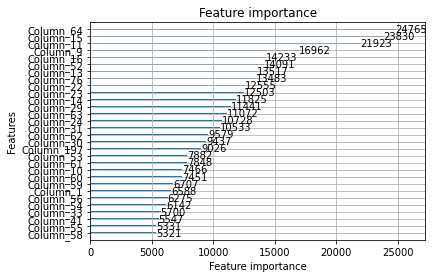

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [ ]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10_1.model")
print('score: ', score)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.876912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 10.0128	valid_0's l2: 205.624
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 9.97584	valid_0's l2: 204.154
[3]	valid_0's l1: 9.93908	valid_0's l2: 202.703
[4]	valid_0's l1: 9.90252	valid_0's l2: 201.263
[5]	valid_0's l1: 9.86621	valid_0's l2: 199.839
[6]	valid_0's l1: 9.83011	valid_0's l2: 198.429
[7]	valid_0's l1: 9.79423	valid_0's l2: 197.035
[8]	valid_0's l1: 9.75856	valid_0's l2: 195.65
[9]	valid_0's l1: 9.7231	valid_0's l2: 194.284
[10]	valid_0's l1: 9.68786	valid_0's l2: 192.93
[11]	valid_0's l1: 9.65285	valid_0's l2: 191.589
[12]	valid_0's l1: 9.61804	valid_0's l2: 190.257
[13]	valid_0's l1: 9.58344	valid_0's l2: 188.943
[14]	valid_0's l1: 9.54904	valid_0's l2: 187.639
[15]	valid_0's l1: 9.51485	valid_0's

In [ ]:
gbm = read_pkl("London/lightgbm_PM10_1.model")
# test_X = np.load("London/X_test.npy")
# test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.29485384349933497

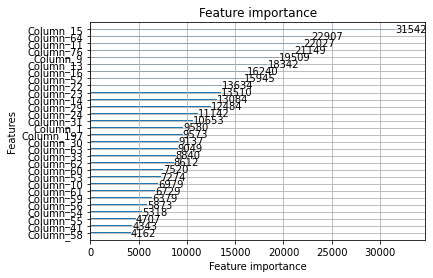

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [ ]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.005, 'depth': 10, 'tree': 2000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10_2.model")
print('score: ', score)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.049286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 10.0128	valid_0's l2: 205.624
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 9.97584	valid_0's l2: 204.154
[3]	valid_0's l1: 9.93908	valid_0's l2: 202.703
[4]	valid_0's l1: 9.90252	valid_0's l2: 201.263
[5]	valid_0's l1: 9.86621	valid_0's l2: 199.839
[6]	valid_0's l1: 9.83011	valid_0's l2: 198.429
[7]	valid_0's l1: 9.79423	valid_0's l2: 197.035
[8]	valid_0's l1: 9.75856	valid_0's l2: 195.65
[9]	valid_0's l1: 9.7231	valid_0's l2: 194.284
[10]	valid_0's l1: 9.68786	valid_0's l2: 192.93
[11]	valid_0's l1: 9.65285	valid_0's l2: 191.589
[12]	valid_0's l1: 9.61804	valid_0's l2: 190.257
[13]	valid_0's l1: 9.58344	valid_0's l2: 188.943
[14]	valid_0's l1: 9.54904	valid_0's l2: 187.639
[15]	valid_0's l1: 9.51485	valid_0's l2: 186.349
[16]	valid_0's l1: 9.48087	valid_0's l2: 185.071
[1

In [ ]:
gbm = read_pkl("London/lightgbm_PM10_2.model")
# test_X = np.load("London/X_test.npy")
# test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.30246981019173264

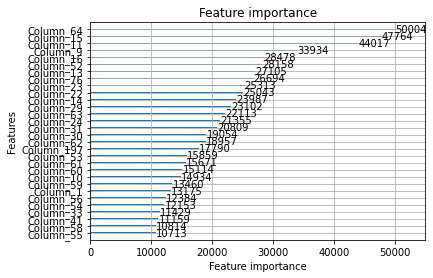

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [ ]:
# NO2

In [16]:
# split the Y_NO2, X into training part and testing part

train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(665395, 182) (166349, 182) (665395,) (166349,)


In [17]:
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2, "Aal/lightgbm_NO2_1.model")
print('score: ', score)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 92.4995	valid_0's l1: 7.265
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 91.7531	valid_0's l1: 7.23516
[3]	valid_0's l2: 91.0141	valid_0's l1: 7.20551
[4]	valid_0's l2: 90.2825	valid_0's l1: 7.17605
[5]	valid_0's l2: 89.5584	valid_0's l1: 7.14676
[6]	valid_0's l2: 88.8422	valid_0's l1: 7.11765
[7]	valid_0's l2: 88.1321	valid_0's l1: 7.08868
[8]	valid_0's l2: 87.4284	valid_0's l1: 7.05984
[9]	valid_0's l2: 86.7312	valid_0's l1: 7.03117
[10]	valid_0's l2: 86.0416	valid_0's l1: 7.00266
[11]	valid_0's l2: 85.3592	valid_0's l1: 6.97433
[12]	valid_0's l2: 84.6844	valid_0's l1: 6.94624
[13]	valid_0's l2: 84.0144	valid_0's l1: 6.91824
[14]	valid_0's l2: 83.3497	valid_0's l1: 6.89032
[15]	valid_0's l2: 82.6935	valid_0'

In [18]:
gbm = read_pkl("Aal/lightgbm_NO2_1.model")
test_X = np.load("Aal/X_test.npy")
test_Y = np.load("Aal/Y_NO2_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3266873366398986

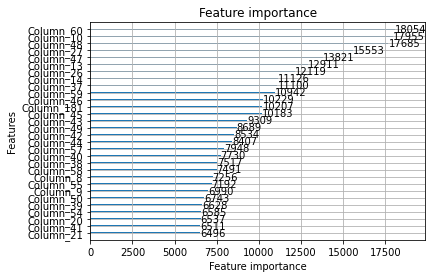

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()